In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('customer_booking.csv', encoding='latin')

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [5]:
def ConvertCat(output):
    columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 
              'booking_origin']
    for col in columns :
        output[col] = LabelEncoder().fit_transform(output[col])
    return output

In [6]:
df = ConvertCat(df)

In [7]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,2,720,4,1,0,1,5.62,0
49996,1,0,2,111,6,4,3,720,4,0,0,0,5.62,0
49997,1,0,2,24,6,22,2,720,4,0,0,1,5.62,0
49998,1,0,2,15,6,11,1,720,4,1,0,1,5.62,0


In [8]:
matrix = df.corr()

In [9]:
print(matrix)

                       num_passengers  sales_channel  trip_type  \
num_passengers               1.000000      -0.002457   0.002261   
sales_channel               -0.002457       1.000000   0.021237   
trip_type                    0.002261       0.021237   1.000000   
purchase_lead                0.212606      -0.013399  -0.008443   
length_of_stay              -0.115850      -0.060352   0.006510   
flight_hour                  0.015607       0.022375  -0.002758   
flight_day                  -0.002243      -0.022759  -0.000892   
route                       -0.048508      -0.020717  -0.008754   
booking_origin               0.052341       0.026449   0.002355   
wants_extra_baggage          0.120404      -0.054254  -0.014078   
wants_preferred_seat         0.028544       0.032943   0.005668   
wants_in_flight_meals        0.022943      -0.022235   0.011955   
flight_duration             -0.063169      -0.038629  -0.039071   
booking_complete             0.024116      -0.041060   0.02702

REMOVE ALL COLUMNS WITH NEGATIVE CORRELATION TO THE "booking_complete" COLUMN

In [10]:
df2 = df.drop(['sales_channel', 'purchase_lead', 'length_of_stay','route', 'flight_duration'], axis=1)

In [11]:
df2

,num_passengers,trip_type,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete
0,2,2,7,2,61,1,0,0,0
1,1,2,3,2,61,0,0,0,0
2,2,2,17,6,36,1,1,0,0
3,1,2,4,2,61,0,0,1,0
4,2,2,15,6,36,1,0,1,0
...,...,...,...,...,...,...,...,...,...
49995,2,2,9,2,4,1,0,1,0
49996,1,2,4,3,4,0,0,0,0
49997,1,2,22,2,4,0,0,1,0
49998,1,2,11,1,4,1,0,1,0


In [12]:
X = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [14]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

40000
10000
40000
10000


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

df3 = pd.DataFrame(X_train, columns = ['num_passengers', 'trip_type','flight_hour','flight_day', 'booking_origin','wants_extra_baggage','wants_preferred_seat', 'wants_in_flight_meals'] )
scaled_features = df3

# col_names = ['num_passengers', 'sales_channel', 'trip_type','purchase_lead','length_of_stay','flight_hour','flight_day', 'route', 'booking_origin','wants_extra_baggage','wants_preferred_seat', 'wants_in_flight_meals','flight_duration']
col_standard_names = ['flight_hour']
features = scaled_features[col_standard_names]
scaler = StandardScaler().fit_transform(features.values)
# features = scaler.transform(features)

In [16]:
df3[col_standard_names] = scaler
print(df3)

       num_passengers  trip_type  flight_hour  flight_day  booking_origin  \
0                   1          2    -1.118072           3               4   
1                   1          2     1.834920           2              91   
2                   1          2     2.019482           2              43   
3                   1          2     2.388606           2              43   
4                   1          2     0.358424           4              91   
...               ...        ...          ...         ...             ...   
39995               1          2    -0.933510           3              93   
39996               3          2     1.465796           2              93   
39997               2          2     0.727548           1               4   
39998               1          2     0.173862           6              17   
39999               1          2     1.096672           0               4   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  
0

In [17]:
X_train = df3.to_numpy()

In [18]:
len(X_train)

40000

In [19]:
X_test

array([[ 1,  2,  4, ...,  0,  1,  1],
       [ 4,  2,  7, ...,  1,  0,  0],
       [ 2,  2,  6, ...,  1,  1,  1],
       ...,
       [ 1,  2,  6, ...,  1,  0,  0],
       [ 2,  2,  7, ...,  1,  0,  0],
       [ 1,  2, 11, ...,  1,  0,  1]], dtype=int64)

In [20]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [21]:
y_pred = np.round(regressor.predict(X_test))
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [22]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)),1))

[[0. 0.]
 [0. 1.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
print('Confusion marix = ')
print(metrics.confusion_matrix(y_test, y_pred))
print('Accuracy score = ', round(accuracy_score(y_test, y_pred),2))

Confusion marix = 
[[7926  598]
 [1287  189]]
Accuracy score =  0.81


In [24]:
correlated = df2.corr()

In [25]:
correlated

,num_passengers,trip_type,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete
num_passengers,1.000000,0.002261,0.015607,-0.002243,0.052341,0.120404,0.028544,0.022943,0.024116
trip_type,0.002261,1.000000,-0.002758,-0.000892,0.002355,-0.014078,0.005668,0.011955,0.027021
flight_hour,0.015607,-0.002758,1.000000,0.009192,0.042426,-0.011434,0.012171,0.013014,0.007127
flight_day,-0.002243,-0.000892,0.009192,1.000000,0.000476,0.005714,-0.005376,-0.005199,0.010929
booking_origin,0.052341,0.002355,0.042426,0.000476,1.000000,-0.028995,-0.050763,-0.084314,0.130804
wants_extra_baggage,0.120404,-0.014078,-0.011434,0.005714,-0.028995,1.000000,0.207669,0.216470,0.068139
wants_preferred_seat,0.028544,0.005668,0.012171,-0.005376,-0.050763,0.207669,1.000000,0.315088,0.050116
wants_in_flight_meals,0.022943,0.011955,0.013014,-0.005199,-0.084314,0.216470,0.315088,1.000000,0.026511
booking_complete,0.024116,0.027021,0.007127,0.010929,0.130804,0.068139,0.050116,0.026511,1.000000


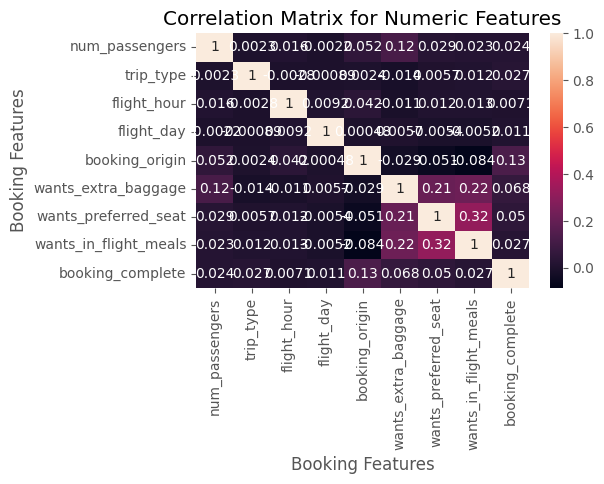

In [26]:
correlation_matrix = df2.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.subplots_adjust(bottom=0.35)
plt.subplots_adjust(left=0.25)
plt.xlabel('Booking Features')
plt.ylabel('Booking Features')
# plt.figure(figsize=(20,20))
plt.savefig('booking_corr.png')
plt.show()